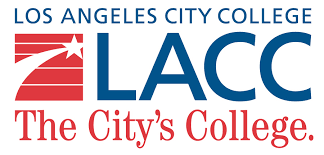

#Hypothesis Tests for a Population Mean
#Created by Professor: Edward Pineda-Castro
#Los Angeles City College

# <center>Classical and P-value Method of Hypothesis Testing Regarding a Standard Deviation</center>



**Example 1:** To test $H_{0}$: σ = 1.2 versus $H_{1}$: σ $\neq$ 1.2, a random sample of size  is obtained from a population that is known to be normally distributed.


**(a)**  If the sample standard deviation is determined to be , compute the test statistic.

In [ ]:
n=22
s=0.8
sigma=1.2

chi2_stat = ((n-1)*s**2)/sigma**2

print(chi2_stat)

9.333333333333336


 **(b)**  If the researcher decides to test this hypothesis at the level of significance, determine the critical values.

In [ ]:
import scipy.stats as stats
alpha = 0.10
df = 21

chi2_left = stats.chi2.ppf(alpha / 2, df)
chi2_right = stats.chi2.ppf(1 - alpha / 2, df)

print(chi2_left,chi2_right)

11.591305208820733 32.670573340917315


**(c)** P-value approach.

In [ ]:
import scipy.stats as stats

p_val = 2 * min(stats.chi2.cdf(chi2_stat, df), 1 - stats.chi2.cdf(chi2_stat, df))

print(p_val)

0.02732101500966106


**(d)**  State the conclusion.

**There is enough evidence to support the claim that sigma is not equal to 1.2.**

**Example 2:**  Suppose a manager is concerned about the variability of the wait-times at his drive through window, so he implements a new drive through system.  Prior to the new system, the standard deviation of wait-time was 18 seconds.  Use the data in the table below to decide whether the evidence suggests the standard deviation wait-time is less than 18 seconds.  Assume that the data comes from a population that is normally distributed and use a  level of significance.

|    |    |    |    |    |
|----|----|----|----|----|
| 108.5 | 67.4 | 58.0 | 75.9 | 65.1 |
| 80.4 | 95.5 | 86.3 | 70.9 | 72.0 |


**Step 1: Hypotheses:**

**Ho: σ = 18 vs H1: σ < 18**




**Step 2: test statistic:**

In [ ]:
# importing Statistics module
import statistics

data = [108.5,	67.4,	58.0,	75.9,	65.1,	80.4,	95.5,	86.3,	70.9,	72.0]

sigma=18

n = len(data)
s = statistics.stdev(data)


chi2_stat = ((n-1)*s**2)/(sigma**2)

print(chi2_stat)


6.422037037037036


**Step 3: Classical Approach (Traditional):**






In [ ]:
import scipy.stats as stats
alpha = 0.05
df = n - 1

chi2_left = stats.chi2.ppf(alpha, df)


print(chi2_left)

3.325112843066815



**Step 4: P-value Approach:**








In [ ]:
import scipy.stats as stats
p_val = 1- stats.chi2.cdf(chi2_stat, df)

print(p_val)

0.6970480159064426


**Step 5: Conclusion in context:**

**There is not enough evidence to support the claim that σ<18 seconds.***

**Practice 1:**  To test $H_0:$ $\sigma=35$  versus $H_1:$ $\sigma>35$, a random sample of size n=15 is obtained from a population that is known to be normally distributed.

**(a)**  If the sample standard deviation is determined to be s=37.4, compute the test statistic.

In [ ]:
n=15
s=37.4
sigma=35

chi2_stat = ((n-1)*s**2)/sigma**2

print(chi2_stat)

15.985828571428572



**(b)**  If the researcher decides to test the hypothesis at the $\alpha$=0.01 level of significance, determine the critical value.

In [ ]:
import scipy.stats as stats
alpha = 0.01
df = 14

chi2_right = stats.chi2.ppf(1-alpha, df)

print(chi2_right)

-28.141237740672796


**(c)** P-value approach.

In [ ]:
import scipy.stats as stats
p_val = stats.chi2.cdf(chi2_stat, df)

print(p_val)

0.04529213700598162


**(d)**  State the conclusion.

**There is not enough evidence to support the claim that sigma is greater than 35.**

#Enter your answer here:

# <center>Hypothesis Test Function for Standard Deviation with Data</center>

In [ ]:
import math
import scipy.stats as stats

def hypothesis_test_sigma(data, population_std, alpha=0.05, tails="two", decimal_places=2):
    n = len(data)
    degrees_of_freedom = n - 1

    # Calculate the sample standard deviation
    sample_std = math.sqrt(sum((x - sum(data) / n) ** 2 for x in data) / degrees_of_freedom)

    # Initialize critical values
    chi2_left = None
    chi2_right = None

    if tails == "two":
        chi2_left = stats.chi2.ppf(alpha / 2, df=degrees_of_freedom)
        chi2_right = stats.chi2.ppf(1 - alpha / 2, df=degrees_of_freedom)
    elif tails == "left":
        chi2_left = stats.chi2.ppf(alpha, df=degrees_of_freedom)
    elif tails == "right":
        chi2_right = stats.chi2.ppf(1 - alpha, df=degrees_of_freedom)

    # Calculate the chi-squared statistic
    chi2_stat = (degrees_of_freedom * sample_std ** 2) / population_std ** 2

    # Calculate the p-value based on the tail
    if tails == "left":
        p_val = 1 - stats.chi2.cdf(chi2_stat, df=degrees_of_freedom)
        if chi2_stat < chi2_left:
            conclusion = "Reject the null hypothesis"
            critical_value = chi2_left
        else:
            conclusion = "Do not reject the null hypothesis"
            critical_value = chi2_left
    elif tails == "right":
        p_val = stats.chi2.cdf(chi2_stat, df=degrees_of_freedom)
        if chi2_stat > chi2_right:
            conclusion = "Reject the null hypothesis"
            critical_value = chi2_right
        else:
            conclusion = "Do not reject the null hypothesis"
            critical_value = chi2_right
    else:
        p_val = 2 * min(stats.chi2.cdf(chi2_stat, df=degrees_of_freedom), 1 - stats.chi2.cdf(chi2_stat, df=degrees_of_freedom))
        if chi2_stat > chi2_right or chi2_stat < chi2_left:
            conclusion = "Reject the null hypothesis"
        else:
            conclusion = "Do not reject the null hypothesis"
        critical_value = (chi2_left, chi2_right)

    # Round the results
    chi2_stat = round(chi2_stat, decimal_places)
    p_val = round(p_val, decimal_places)
    if tails == "left" or tails == "right":
        critical_value = round(critical_value, decimal_places)
    else:
        chi2_left = round(critical_value[0], decimal_places)
        chi2_right = round(critical_value[1], decimal_places)

    # Print the results
    if tails == "left":
        print("Critical Value (Left): {}".format(critical_value))
    elif tails == "right":
        print("Critical Value (Right): {}".format(critical_value))
    else:
        print("Critical Values: ({}, {})".format(chi2_left, chi2_right))
    print("Chi-squared Statistic: {}".format(chi2_stat))
    print("P-value: {}".format(p_val))
    print("Conclusion: {}".format(conclusion))




#Enter your values into the function:

In [ ]:
# "left" for one-tailed left, "right" for one-tailed right, "two" for two-tailed
data = [108.5,	67.4,	58.0,	75.9,	65.1,	80.4,	95.5,	86.3,	70.9,	72.0]
hypothesis_test_sigma(data=data, population_std=18, alpha=0.05, tails="left", decimal_places=4)

Critical Value (Left): 3.3251
Chi-squared Statistic: 6.422
P-value: 0.697
Conclusion: Do not reject the null hypothesis


# <center>Hypothesis Test Function for standard deviation without Data</center>

In [ ]:
import math
import scipy.stats as stats

def hypothesis_test_sigma(sample_std, sample_size, population_std, alpha=0.05, tails="two", decimal_places=2):
    # Calculate the degrees of freedom
    degrees_of_freedom = sample_size - 1

    # Initialize critical values
    chi2_left = None
    chi2_right = None

    if tails == "two":
        # Calculate the chi-squared critical values for a two-tailed test
        chi2_left = stats.chi2.ppf(alpha / 2, df=degrees_of_freedom)
        chi2_right = stats.chi2.ppf(1 - alpha / 2, df=degrees_of_freedom)
    elif tails == "left":
        # Calculate the chi-squared critical value for a left-tailed test
        chi2_left = stats.chi2.ppf(alpha, df=degrees_of_freedom)
    elif tails == "right":
        # Calculate the chi-squared critical value for a right-tailed test
        chi2_right = stats.chi2.ppf(1 - alpha, df=degrees_of_freedom)

    # Calculate the chi-squared statistic
    chi2_stat = (degrees_of_freedom * sample_std ** 2) / population_std ** 2

    # Calculate the p-value based on the tail
    if tails == "left":
        p_val = 1 - stats.chi2.cdf(chi2_stat, df=degrees_of_freedom)
        if chi2_stat < chi2_left:
            conclusion = "Reject the null hypothesis"
        else:
            conclusion = "Do not reject the null hypothesis"
    elif tails == "right":
        p_val = stats.chi2.cdf(chi2_stat, df=degrees_of_freedom)
        if chi2_stat > chi2_right:
            conclusion = "Reject the null hypothesis"
        else:
            conclusion = "Do not reject the null hypothesis"
    else:
        p_val = 2 * min(stats.chi2.cdf(chi2_stat, df=degrees_of_freedom), 1 - stats.chi2.cdf(chi2_stat, df=degrees_of_freedom))
        if chi2_stat > chi2_right or chi2_stat < chi2_left:
            conclusion = "Reject the null hypothesis"
        else:
            conclusion = "Do not reject the null hypothesis"

    # Round the results
    chi2_stat = round(chi2_stat, decimal_places)
    p_val = round(p_val, decimal_places)

    if chi2_left is not None:
        chi2_left = round(chi2_left, decimal_places)
    if chi2_right is not None:
        chi2_right = round(chi2_right, decimal_places)

    # Print the results
    if chi2_left is not None and chi2_right is not None:
        print("Chi-squared Critical Values: ({}, {})".format(chi2_left, chi2_right))
    elif chi2_left is not None:
        print("Chi-squared Critical Value (Left): {}".format(chi2_left))
    elif chi2_right is not None:
        print("Chi-squared Critical Value (Right): {}".format(chi2_right))

    print("Chi-squared Statistic: {}".format(chi2_stat))
    print("P-value: {}".format(p_val))
    print("Conclusion: {}".format(conclusion))


#Enter your values into the function:

In [ ]:
# "left" for one-tailed left, "right" for one-tailed right, "two" for two-tailed
hypothesis_test_sigma(sample_std=0.8, sample_size=22, population_std=1.2, alpha=0.10, tails="two", decimal_places=4)

Chi-squared Critical Values: (11.5913, 32.6706)
Chi-squared Statistic: 9.3333
P-value: 0.0273
Conclusion: Reject the null hypothesis
